# 欠損値の取り扱い

In [1]:
from io import StringIO
import pandas as pd
import numpy as np

In [2]:
# サンプルデータ作成
csv_data = '''A,B,C,D
              1.0,2.0,3.0,4.0
              5.0,6.0,,8.0
              10.0,11.0,12.0,'''

In [3]:
StringIO(csv_data)

In [4]:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


# 各カラムのNaNの個数をカウント

In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

# 欠損値を除去

In [6]:
# 1つでも欠損値を含む行削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# 1つでも欠損値を持つ列を削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# すべての列がNaNの行を削除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# 非NaN値が4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [11]:
# 特定の列がNaNを含む行を削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

# 欠損値補完

In [13]:
# 平均値補完
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
# 欠損値補完のインスタンス生成（平均値補完）
# imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
# データを適合
imr = imr.fit(df.values)
# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# カテゴリデータの処理

In [14]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['ble', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,ble,XL,15.3,class1


# 順序特徴量のマッピング

In [15]:
# サイズと整数を対応させるディクショナリ
size_mapping = {'XL':3, 'L':2, 'M':1}
# サイズを整数へ変換
df['size'] = df['size'].map(size_mapping)

In [16]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,ble,3,15.3,class1


In [17]:
# 逆にマッピング
inv_size_mapping = {v:k for k, v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)

In [18]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,ble,XL,15.3,class1


# クラスラベルのエンコーディング

In [19]:
# マッピング用ディクショナリ作成
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [20]:
# クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)

In [21]:
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,ble,XL,15.3,0


In [22]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,ble,XL,15.3,class1


In [23]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンス生成
class_le = LabelEncoder()
# クラスラベルを整数へ変換
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [24]:
# クラスラベルを文字列に戻す
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

# 名義特徴量でのone-hotエンコーディング

In [25]:
from sklearn.preprocessing import OneHotEncoder
# one-hotエンコーダの生成
ohe = OneHotEncoder(categorical_features=[0])
# one-hotエンコーディングを実行
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)
ohe.fit_transform(X).toarray()

[[1 'M' 10.1]
 [2 'L' 13.5]
 [0 'XL' 15.3]]


c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


ValueError: could not convert string to float: 'M'

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("category", OneHotEncoder(), [0])], remainder="passthrough")
ct.fit_transform(X)

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

# 特徴量選択

## データセット準備

In [31]:
# wineデータセットを読み込み
df_wine = pd.read_csv('./wine.data', header=None)
df_wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [33]:
# 列名を設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
df_wine.head(2)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [35]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [64]:
X[0, 0:12]

array([ 14.23,   1.71,   2.43,  15.6 , 127.  ,   2.8 ,   3.06,   0.28,
         2.29,   5.64,   1.04,   3.92])

In [36]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## L1/L2正則化

In [41]:
from sklearn.linear_model import LogisticRegression
# L1正則化ロジスティック回帰のインスタンス生成（逆正則化パラメータC）
lr = LogisticRegression(penalty='l1', C=1.0)
# lr = lbfgs(penalty='l1', C=1.0)
# トレーニングデータに適合
lr.fit(X_train_std, y_train)
# トレーニングデータに対する正解率の表示
print('Training accuracy:{}'.format(lr.score(X_train_std, y_train)))
# テストデータに対する正解率の表示
print('Test accuracy:{}'.format(lr.score(X_test_std, y_test)))
# 切片の表示
print(lr.intercept_)
# 重み係数の表示
print(lr.coef_)

Training accuracy:1.0
Test accuracy:1.0
[-1.2635255  -1.21596229 -2.37032117]
[[ 1.24582331  0.18045918  0.74312464 -1.16096974  0.          0.
   1.16836839  0.          0.          0.          0.          0.54864337
   2.51017592]
 [-1.53711712 -0.38723504 -0.99508453  0.36503792 -0.05976413  0.
   0.66811886  0.          0.         -1.93473927  1.23324741  0.
  -2.2313193 ]
 [ 0.13562479  0.16833572  0.35724367  0.          0.          0.
  -2.43797418  0.          0.          1.56375454 -0.81920298 -0.49248366
   0.        ]]


c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\cross\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

13


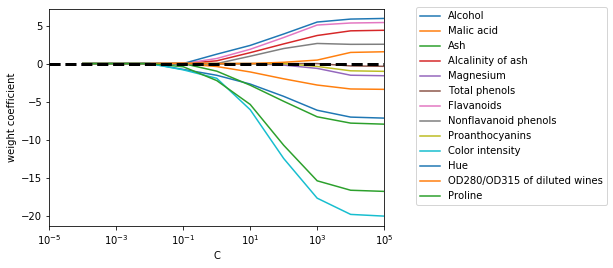

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

# 空のリスト生成
weights, params = [], []
# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
# 重み係数をNumpy配列に変換
weights = np.array(weights)
print(weights.shape[1])

# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    # 横軸を逆正則化パラメータ, 縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1])

# y =0に黒い波線を引く
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## 特徴選択アルゴリズム

### SBS（逐次後退選択）

In [84]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    """
    SBS(逐次後退選択)を実行するクラス
    """
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring # 特徴量を評価する指標
        self.estimator = clone(estimator) # 推定器
        self.k_features = k_features # 選択する特徴量の個数
        self.test_size = test_size # テストデータの割合
        self.random_state = random_state # 乱数種を固定する
        # self.k_score = 0
        # self.scores_ = []
        # self.scores_ = []
        
    def fit(self, X, y):
        # トレーニングデータとテストデータに分割
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        # すべての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        # すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        # スコアを格納
        self.scores_ = [score]
        # 指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            # 空のリスト生成（スコア, 列インデックス）
            scores = []
            subsets = []
            
            # 特徴量の部分集合を表す列インデックスの組合せごとに処理を反復
            # 元の特徴量の個数から１つ減った個数分特徴量の組合せ1つごとに反復
            for p in combinations(self.indices_, r=dim-1):
                # スコアを算出して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                
            # 最良スコアのインデックスを抽出
            best = np.argmax(scores)
            # 最良スコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 1つ減らした特徴量の個数にdimを合わせる
            dim -= 1
            
            # スコアを格納
            self.scores_.append(scores[best])
            
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        # 抽出した特徴量を返す
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:, indices], y_train)
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # 真のクラスラベルと予測値を用いてスコアを算出
        score = self.scoring(y_test, y_pred)
        return score

### K近傍法でSBSを試し使い

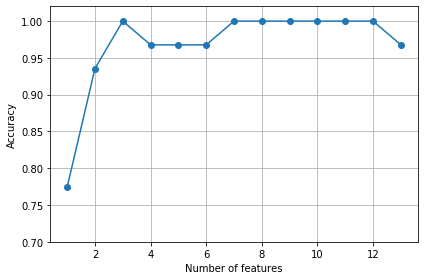

In [85]:
from sklearn.neighbors import KNeighborsClassifier
# K近傍法のスンスタンス生成（近傍点数５）
knn = KNeighborsClassifier(n_neighbors = 5)
# SBSインスタンス生成（特徴量個数が1になるまで選択）
sbs = SBS(knn, k_features=1)
# SBS実行
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [90]:
# 選択した3つの特徴量を表示
# SBSで13個の特徴量から1個ずつ減らしていくので、特徴量3つは[10]に対応する
# 説明変数の中で特徴量のインデックスを取得
k3 = list(sbs.subsets_[10])
print(sbs.subsets_[10])
# 目的変数を飛ばして、カラム名から3つの特徴量選択
print(df_wine.columns[1:][k3])

(0, 1, 11)
Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [92]:
# 全特徴量
print("全特徴量")
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

# SBSで3つに特徴量絞った
print("3つに絞った特徴量")
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

全特徴量
Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629
3つに絞った特徴量
Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


[0.11852942 0.02564836 0.01327854 0.02236594 0.03135708 0.05087243
 0.17475098 0.01335393 0.02556988 0.1439199  0.058739   0.13616194
 0.1854526 ]
[0.01327854 0.01335393 0.02236594 0.02556988 0.02564836 0.03135708
 0.05087243 0.058739   0.11852942 0.13616194 0.1439199  0.17475098
 0.1854526 ]
[ 2  7  3  8  1  4  5 10  0 11  9  6 12]
[12  6  9 11  0 10  5  4  1  8  3  7  2]
13
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


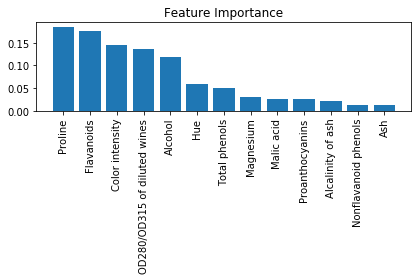

In [116]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
#importances = forest.feature_importances_
importances = forest.feature_importances_
print(importances)
print(np.sort(importances))
print(np.argsort(importances))

# 降順にソートして、そのインデックスを取得
indices = np.argsort(importances)[::-1]
print(indices)

print(X_train.shape[1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

# numpyのインデックスがそれぞれカラム名何に当たるか変換
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### SelectFromModelによる特徴量選択

In [114]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


# 実験

In [59]:
print(range(2))
print(tuple(range(2)))
print([tuple(range(2))])

range(0, 2)
(0, 1)
[(0, 1)]
